In [317]:
import csv


def get_data():
    file = 'iris.csv'
    df = {'setosa':[],'versicolor':[],'virginica':[]}

    with open(file, 'r') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)
        for row in reader:
            try:
                if row[4]=='setosa':
                    df['setosa'].append([float(i) for i in row[0:4]])
                if row[4]=='versicolor':
                    df['versicolor'].append([float(i) for i in row[0:4]])
                if row[4]=='virginica':
                    df['virginica'].append([float(i) for i in row[0:4]])
            except:
                print("error")
#     print(len(df['setosa']))
    return df

df = get_data()

In [318]:
# def get_stats(df):
#     df2 = {'setosa':[],'versicolor':[],'virginica':[]}
#     for key in df2:
        
#         #adding average for sepal_len
#         df2[key].append(round(sum(df[key][i][0] for i in range(len(df[key])))/50,2))
#         #adding average for sepal width
#         df2[key].append(round(sum(df[key][i][1] for i in range(len(df[key])))/50,2))
#         #adding average for petal length
#         df2[key].append(round(sum(df[key][i][2] for i in range(len(df[key])))/50,2))
#         #adding average for petal width
#         df2[key].append(round(sum(df[key][i][3] for i in range(len(df[key])))/50,2))
#     return {key:[str(i)for i in value] for key,value in df2.items()}

        
# df_stats = get_stats(df)

# print(df_stats)

{'setosa': ['5.01', '3.42', '1.46', '0.24'], 'versicolor': ['5.94', '2.77', '4.26', '1.33'], 'virginica': ['6.59', '2.97', '5.55', '2.03']}


Below is a a new datastructure that is a dictionary of dictionaries of lists where the list order 0:4 is count, mean, std, min, max

In [322]:
import csv
from copy import deepcopy # required when trying to deepcopy a dict with nest lists


def get_data():
    file = 'iris.csv'
    attributes = {'sepal_length':[],'sepal_width':[],'petal_length':[],'petal_width':[]}
    df = {'setosa':deepcopy(attributes),'versicolor':deepcopy(attributes),'virginica':deepcopy(attributes)}

    with open(file, 'r') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)
        for row in reader:
            try:
                df[row[4]]['sepal_length'].append(float(row[0]))
                df[row[4]]['sepal_width'].append(float(row[1]))
                df[row[4]]['petal_length'].append(float(row[2]))
                df[row[4]]['petal_width'].append(float(row[3]))
            except:
                print("error")
#     print(len(df['setosa']))
    return df

df = get_data()

In [320]:
# from copy import deepcopy # required when trying to deepcopy a dict with nest lists
# from math import sqrt

# # def get_stats(df):
# stats = {'count':0, 'mean':0, 'std':0, 'min':0, 'max':0, 'sum':0}
# attributes = {'sepal_length':deepcopy(stats),'sepal_width':deepcopy(stats),'petal_length':deepcopy(stats),'petal_width':deepcopy(stats)}
# df2 = {'setosa':deepcopy(attributes),'versicolor':deepcopy(attributes),'virginica':deepcopy(attributes)}
    
# for flower in df2:
#     for attribute in df2[flower]:
#         # calculate count
#         df2[flower][attribute]['count'] = len(df[flower][attribute]) 
        
#          # calculate mean, used for other stuff below
#         df2[flower][attribute]['sum'] = sum(df[flower][attribute])
        
#         # calculate mean
#         df2[flower][attribute]['mean'] = df2[flower][attribute]['sum']/df2[flower][attribute]['count']
        
#         # calculate std
#         mu = df2[flower][attribute]['mean'] # get the mean from above line so below line isnt so long
#         df2[flower][attribute]['std'] = sqrt(sum((df[flower][attribute][i] - mu)**2 for i in range(len(df[flower][attribute])))/len(df[flower][attribute]))
        
#         # calculate min
#         df2[flower][attribute]['min'] = min(df[flower][attribute])
        
#         # calculate max
#         df2[flower][attribute]['min'] = max(df[flower][attribute])


In [323]:
from copy import deepcopy # required when trying to deepcopy a dict with nest lists
from math import sqrt

def get_stats(df):
    attributes = {'sepal_length':0,'sepal_width':0,'petal_length':0,'petal_width':0}
    stats = {'count':deepcopy(attributes), 'mean':deepcopy(attributes), 'std':deepcopy(attributes), 'min':deepcopy(attributes), 'max':deepcopy(attributes), 'sum':deepcopy(attributes)}
    df2 = stats

    for attribute in df2['count']:
        # calculate count
        df2['count'][attribute] = sum(len(df[flower][attribute]) for flower in df.keys())

        # calculate mean, used for other stuff below
        df2['mean'][attribute] = round(sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])/df2['count'][attribute],4)

        # calculate std
        df2['std'][attribute] = round(sqrt(sum([sum([(df[flower][attribute][i] - df2['mean'][attribute])**2 for i in range(len(df[flower][attribute]))]) for flower in df.keys()])/(df2['count'][attribute] - 1)),4)

        # calucalate min
        df2['min'][attribute] = min([min([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])

        # calculate max
        df2['max'][attribute] = max([max([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])

        # calculate sum for the hell of it
        df2['sum'][attribute] = round(sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()]),4)
    return df2

df_stats = get_stats(df)

In [ ]:
# attribute = 'petal_length'

# for attribute in df2['mean']:
#     # calculate mean, used for other stuff below
#     df2['mean'][attribute] = sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])/df2['count'][attribute]

# sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])

In [324]:
def pretty_print(df):
    print('\t'.join(['\tsepal_length','sepal_width','petal_length','petal_width']))
    for stat in df:
        print(stat,'\t',end="")
        for attribute in df[stat]:
            print(df[stat][attribute], end='\t\t')
        print()
        
pretty_print(df_stats)

	sepal_length	sepal_width	petal_length	petal_width
count 	150		150		150		150		
mean 	5.8433		3.054		3.7587		1.1987		
std 	0.8281		0.4336		1.7644		0.7632		
min 	4.3		2.0		1.0		0.1		
max 	7.9		4.4		6.9		2.5		
sum 	876.5		458.1		563.8		179.8		


In [325]:
import matplotlib.pyplot as plt

def plot(df, xattribute, yattribute):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(xattribute, fontsize = 15)
    ax.set_ylabel(yattribute, fontsize = 15)
    ax.set_title('Iris dataset', fontsize = 20)
    flowers = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    flowers1 = ['setosa', 'versicolor', 'virginica']
    colors = ['r', 'g', 'b']
    for flower, color in zip(flowers1,colors):
        ax.scatter(df[flower][xattribute]
                   , df[flower][yattribute]
                   , c = color
                   , s = 50)
    ax.legend(flowers)
    ax.grid()

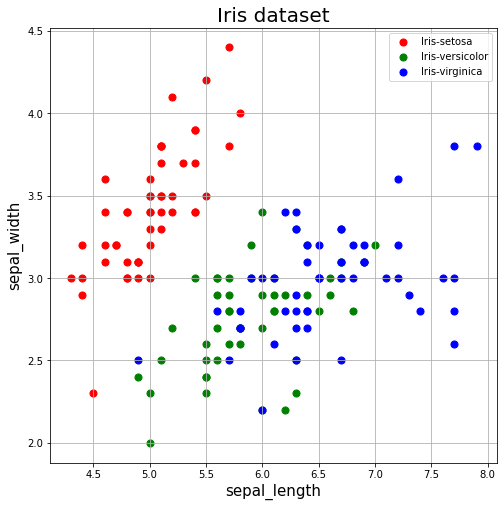

In [326]:
plot(df, xattribute = 'sepal_length', yattribute = 'sepal_width')

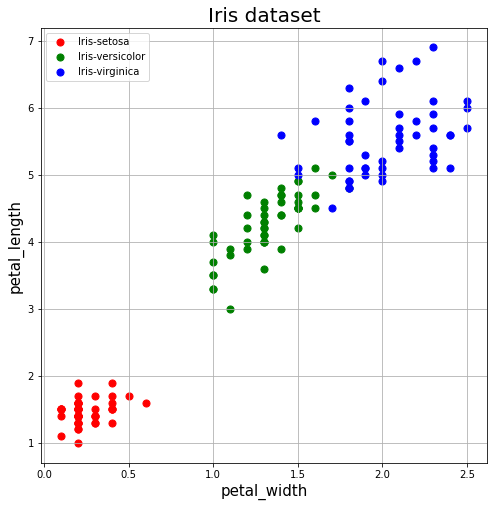

In [327]:
plot(df, xattribute = 'petal_width', yattribute = 'petal_length')

In [340]:
def normalize(df):
    
    df_stats = get_stats(df)
    
    def func(x, mx, mn):
        return round((x - mn)/(mx - mn),4)
    
    
    df2 = deepcopy(df)
    for flower in df2:
        for attribute in df2[flower]:
            mn = df_stats['min'][attribute]
            mx = df_stats['max'][attribute]
            df2[flower][attribute] = [func(x,mx,mn) for x in df[flower][attribute]]

    return df2

df_norm = normalize(df)

df_norm_stats =  get_stats(df_norm)

pretty_print(df_norm_stats)

# plot(df_norm, xattribute = 'sepal_length', yattribute = 'sepal_width')
# plot(df_norm, xattribute = 'petal_width', yattribute = 'petal_length')


	sepal_length	sepal_width	petal_length	petal_width
count 	150		150		150		150		
mean 	0.4287		0.4392		0.4676		0.4578		
std 	0.23		0.1807		0.2991		0.318		
min 	0.0		0.0		0.0		0.0		
max 	1.0		1.0		1.0		1.0		
sum 	64.3054		65.8749		70.1349		68.667		


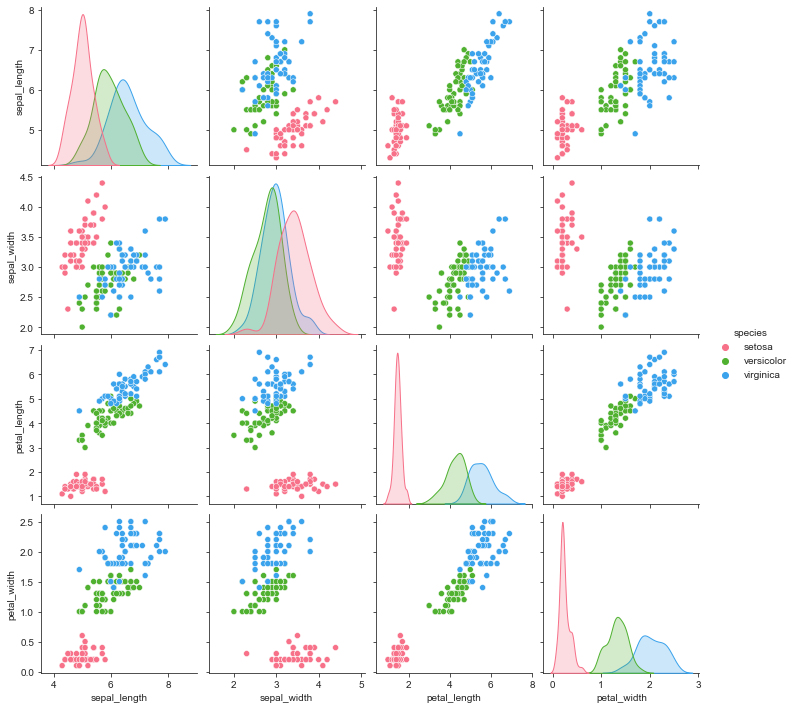

In [345]:
#bonus
import seaborn as sb
df = sb.load_dataset("iris")
sb.set_style("ticks")
sb.pairplot(df,hue = 'species',diag_kind = "auto", kind = "scatter",palette = "husl")
plt.show()

From the above pairs plot it looks as if petal width and petal length are the most linearly separable amongst the different species. These make them the best to use in a deceision tree classifier upon selecting proper thresholds. For petal length the best thresholds seem to be around 2.2 and 4.5 and for petal width, 0.8 and 1.8. 

In [ ]:
if petal_length	< 2.2:
    species = 'setosa'
elif petal_width < 2:
    if petal_length < 6:
        if petal_width <2:
            species = 'versicolor'
            
else:
    species = 'virginica'
    

In [346]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [376]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [377]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [373]:
import numpy as np
X = iris.data
mask = np.array([False, False, True, True])
X_masked = X[:, mask]

In [374]:
iris.feature_names = iris.feature_names[2:4]

In [359]:
iris.data = X_masked

In [378]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

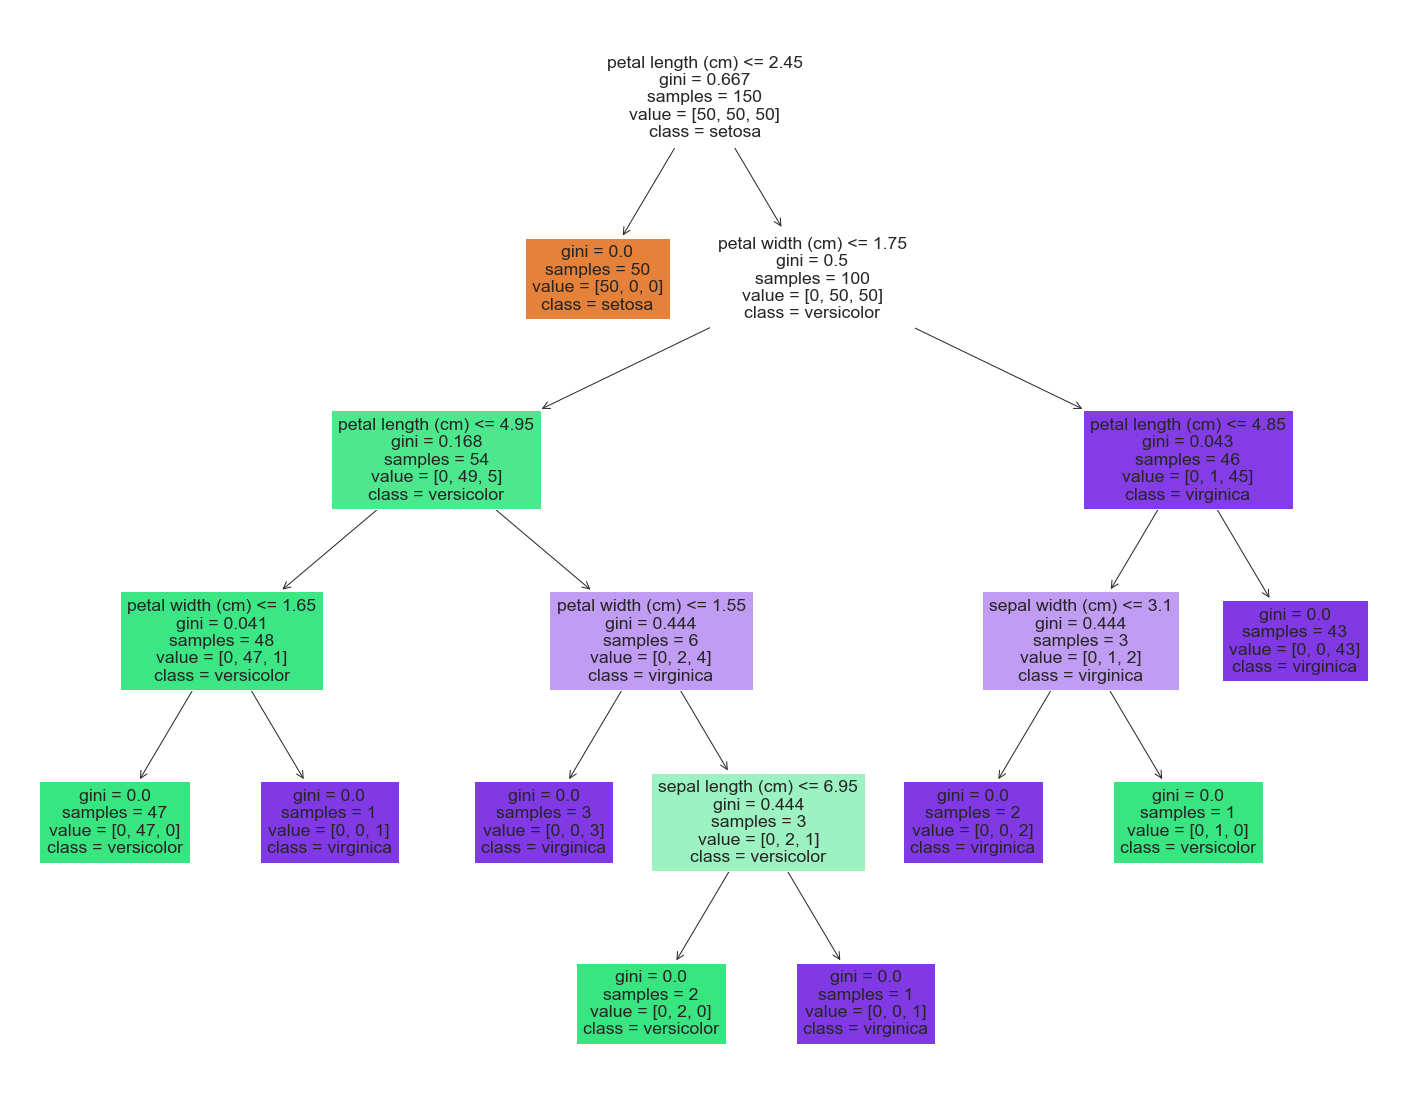

In [380]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)